In [ ]:
! pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 192.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 179.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.9 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


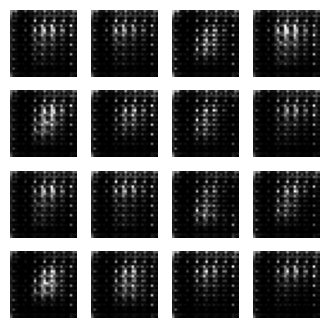

Error computing FID: Command '['python', '-m', 'pytorch_fid', 'real_images', 'generated_images']' returned non-zero exit status 1.
Epoch 1, Time: 43.11 sec, Gen Loss: 0.8215, Disc Loss: 1.2156, FID: N/A


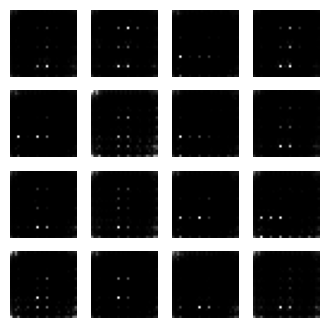

Error computing FID: Command '['python', '-m', 'pytorch_fid', 'real_images', 'generated_images']' returned non-zero exit status 1.
Epoch 2, Time: 38.95 sec, Gen Loss: 0.9041, Disc Loss: 0.9836, FID: N/A


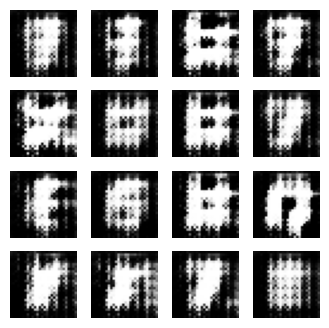

Error computing FID: Command '['python', '-m', 'pytorch_fid', 'real_images', 'generated_images']' returned non-zero exit status 1.
Epoch 3, Time: 40.85 sec, Gen Loss: 1.1918, Disc Loss: 0.8583, FID: N/A


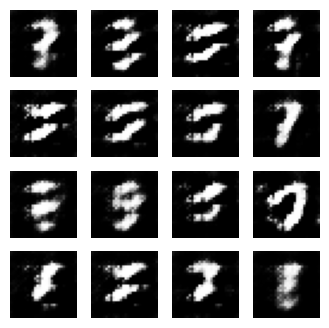

Error computing FID: Command '['python', '-m', 'pytorch_fid', 'real_images', 'generated_images']' returned non-zero exit status 1.
Epoch 4, Time: 42.03 sec, Gen Loss: 0.9057, Disc Loss: 1.1920, FID: N/A


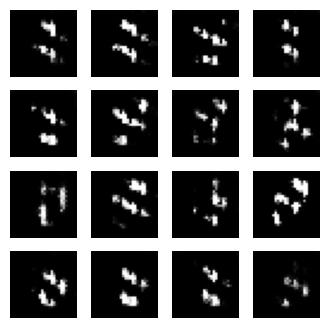

Error computing FID: Command '['python', '-m', 'pytorch_fid', 'real_images', 'generated_images']' returned non-zero exit status 1.
Epoch 5, Time: 41.09 sec, Gen Loss: 1.3207, Disc Loss: 0.6799, FID: N/A


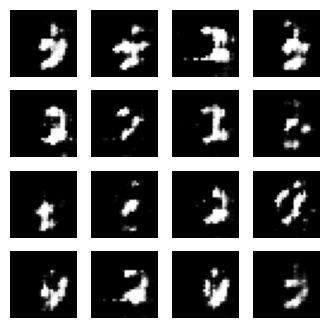

Error computing FID: Command '['python', '-m', 'pytorch_fid', 'real_images', 'generated_images']' returned non-zero exit status 1.
Epoch 6, Time: 42.01 sec, Gen Loss: 0.9113, Disc Loss: 1.1601, FID: N/A


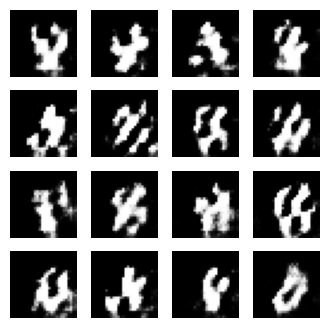

Error computing FID: Command '['python', '-m', 'pytorch_fid', 'real_images', 'generated_images']' returned non-zero exit status 1.
Epoch 7, Time: 41.38 sec, Gen Loss: 0.9776, Disc Loss: 1.1542, FID: N/A


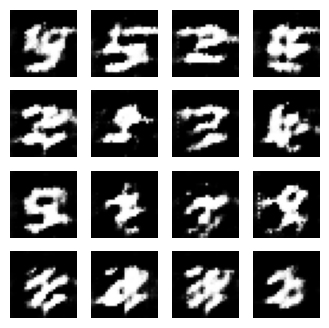

Error computing FID: Command '['python', '-m', 'pytorch_fid', 'real_images', 'generated_images']' returned non-zero exit status 1.
Epoch 8, Time: 41.60 sec, Gen Loss: 0.7429, Disc Loss: 1.3921, FID: N/A


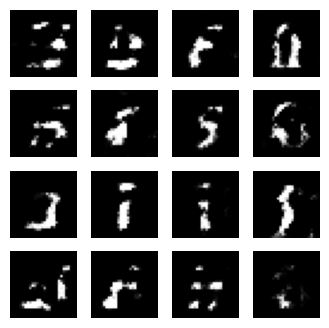

Error computing FID: Command '['python', '-m', 'pytorch_fid', 'real_images', 'generated_images']' returned non-zero exit status 1.
Epoch 9, Time: 41.49 sec, Gen Loss: 1.1027, Disc Loss: 1.3325, FID: N/A


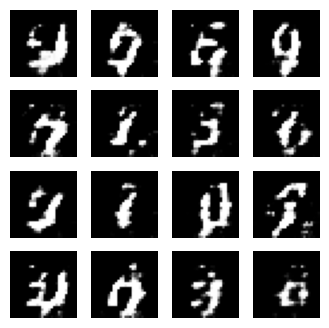

Error computing FID: Command '['python', '-m', 'pytorch_fid', 'real_images', 'generated_images']' returned non-zero exit status 1.
Epoch 10, Time: 40.60 sec, Gen Loss: 0.9299, Disc Loss: 1.2424, FID: N/A


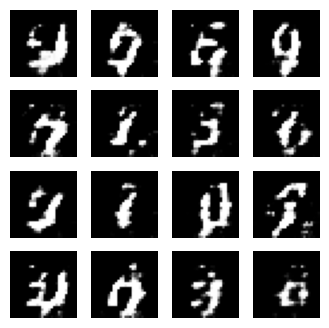

In [ ]:
# Simple DCGAN for Synthetic Image Generation with FID Evaluation
# This notebook demonstrates how to use a Deep Convolutional Generative Adversarial Network (DCGAN)
# to generate synthetic handwritten digit images from the MNIST dataset.
# It includes Fréchet Inception Distance (FID) evaluation to assess the quality of generated images.
# Designed to be simple, fast, and runnable in Google Colab with a GPU.

# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
import subprocess

# Install pytorch-fid and dependencies
subprocess.run(["pip", "install", "pytorch-fid", "torch", "torchvision"], check=True)

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Step 1: Load and Preprocess MNIST Dataset
def load_mnist_data():
    # Load MNIST dataset (28x28 grayscale images)
    (train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()

    # Normalize images to [-1, 1] and reshape for DCGAN
    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
    train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

    # Create a TensorFlow dataset
    buffer_size = 60000
    batch_size = 256
    train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(buffer_size).batch(batch_size)
    return train_dataset, train_images

# Step 2: Define the Generator Model
def make_generator_model():
    model = tf.keras.Sequential([
        # Input: Random noise vector (100-dimensional)
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        # Reshape to feature map
        layers.Reshape((7, 7, 256)),

        # Upsample to 14x14
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        # Upsample to 28x28
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        # Output: 28x28x1 image
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

# Step 3: Define the Discriminator Model
def make_discriminator_model():
    model = tf.keras.Sequential([
        # Input: 28x28x1 image
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        # Downsample
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        # Flatten and output probability
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Step 4: Define Loss Functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Step 5: Setup Models and Optimizers
generator = make_generator_model()
discriminator = make_discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Step 6: Training Loop
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Step 7: Generate and Save Images
def generate_and_save_images(model, epoch, test_input, save_dir='generated_images'):
    # Ensure save directory exists
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    predictions = model(test_input, training=False)

    # Display images
    fig = plt.figure(figsize=(4, 4))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig(f'{save_dir}/image_at_epoch_{epoch:04d}.png')
    plt.show()

    # Save individual images for FID (convert to RGB)
    for i in range(predictions.shape[0]):
        img = predictions[i, :, :, 0] * 127.5 + 127.5  # Denormalize to [0, 255]
        img = img.numpy().astype(np.uint8)
        # Convert grayscale to RGB by repeating the channel
        img_rgb = np.repeat(img[:, :, np.newaxis], 3, axis=2)
        img_pil = Image.fromarray(img_rgb)
        img_pil.save(f'{save_dir}/gen_{epoch:04d}_{i}.png')

# Step 8: Save Real Images for FID
def save_real_images(real_images, save_dir='real_images', num_images=1000):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    indices = np.random.choice(len(real_images), num_images, replace=False)
    for i, idx in enumerate(indices):
        img = real_images[idx, :, :, 0] * 127.5 + 127.5  # Denormalize to [0, 255]
        img = img.astype(np.uint8)
        # Convert grayscale to RGB
        img_rgb = np.repeat(img[:, :, np.newaxis], 3, axis=2)
        img_pil = Image.fromarray(img_rgb)
        img_pil.save(f'{save_dir}/real_{i}.png')

# Step 9: Compute FID
def compute_fid(real_dir, gen_dir):
    # Check if directories have images
    real_images = [f for f in os.listdir(real_dir) if f.endswith('.png')]
    gen_images = [f for f in os.listdir(gen_dir) if f.endswith('.png')]
    if len(real_images) == 0 or len(gen_images) == 0:
        print(f"Warning: Empty directory - real: {len(real_images)}, generated: {len(gen_images)}")
        return None

    try:
        # Run pytorch-fid command
        result = subprocess.run(
            ["python", "-m", "pytorch_fid", real_dir, gen_dir],
            capture_output=True, text=True, check=True
        )
        # Extract FID score from output
        fid_score = float(result.stdout.split()[-1])
        return fid_score
    except Exception as e:
        print(f"Error computing FID: {e}")
        return None

# Step 10: Training and Evaluation
def train(dataset, real_images, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        # Generate and save images
        generate_and_save_images(generator, epoch + 1, seed)

        # Compute FID every epoch
        fid_score = compute_fid('real_images', 'generated_images')
        fid_str = f"{fid_score:.2f}" if fid_score is not None else "N/A"
        print(f'Epoch {epoch + 1}, Time: {time.time() - start:.2f} sec, '
              f'Gen Loss: {gen_loss:.4f}, Disc Loss: {disc_loss:.4f}, FID: {fid_str}')

    # Generate final images
    generate_and_save_images(generator, epochs, seed)

# Step 11: Run Training
# Parameters
noise_dim = 100
batch_size = 256
epochs = 10
num_examples_to_generate = 16

# Seed for consistent visualization
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# Load data
train_dataset, real_images = load_mnist_data()

# Save real images for FID
save_real_images(real_images, num_images=1000)

# Start training
train(train_dataset, real_images, epochs)

# Note: Generated images are saved in 'generated_images/' and displayed after each epoch.
# FID scores are printed to evaluate the quality of generated images (lower is better).
# If FID fails, visual inspection can still be used to assess image quality.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


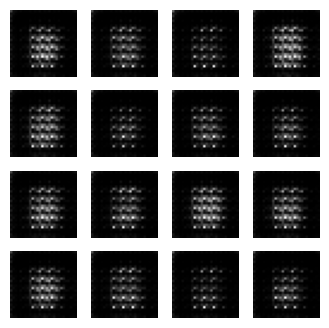

Epoch 1, Time: 20.04 sec, Gen Loss: 0.6727, Disc Loss: 1.3136


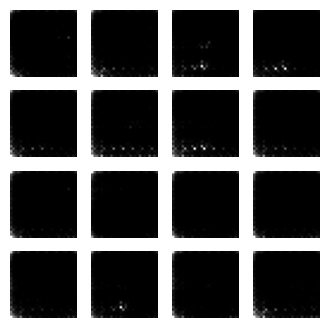

Epoch 2, Time: 17.64 sec, Gen Loss: 0.6990, Disc Loss: 1.4896


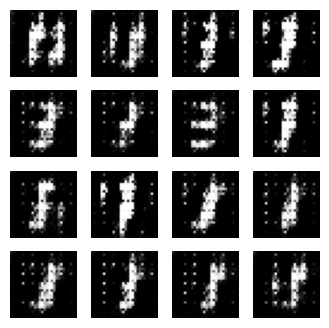

Epoch 3, Time: 17.66 sec, Gen Loss: 0.8857, Disc Loss: 1.2522


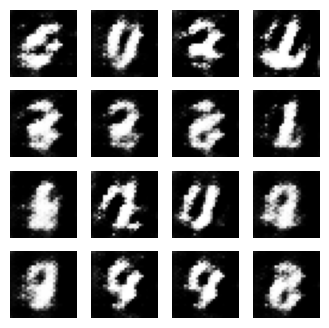

Epoch 4, Time: 17.63 sec, Gen Loss: 0.7100, Disc Loss: 1.4787


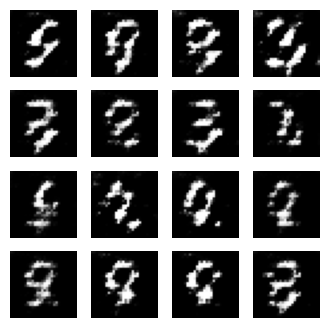

Epoch 5, Time: 17.68 sec, Gen Loss: 0.8773, Disc Loss: 1.1172


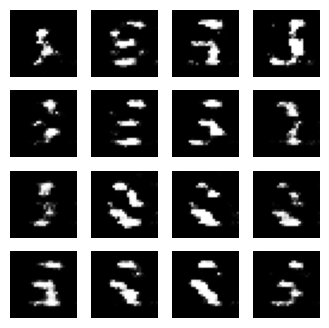

Epoch 6, Time: 17.59 sec, Gen Loss: 0.9103, Disc Loss: 1.1022


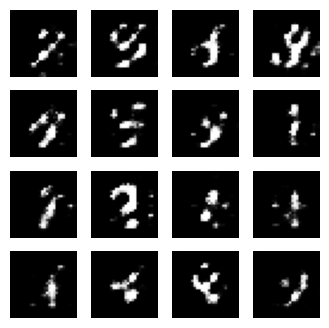

Epoch 7, Time: 17.95 sec, Gen Loss: 0.7137, Disc Loss: 1.4594


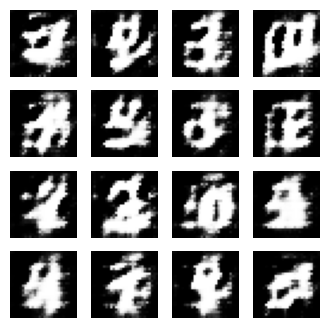

Epoch 8, Time: 17.63 sec, Gen Loss: 0.7820, Disc Loss: 1.2952


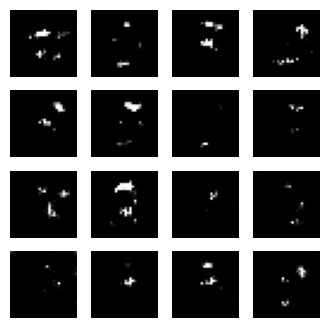

Epoch 9, Time: 17.65 sec, Gen Loss: 0.9342, Disc Loss: 1.2870


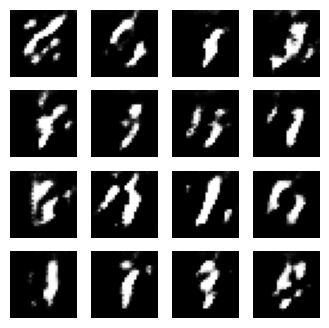

Epoch 10, Time: 17.67 sec, Gen Loss: 0.8387, Disc Loss: 1.2397


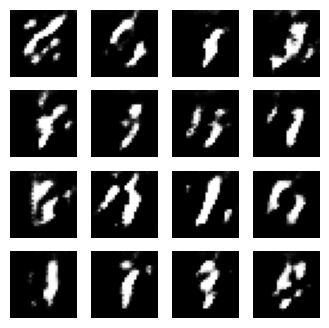

In [8]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import time
import os

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Step 1: Load and preprocess MNIST dataset
def load_mnist_data():
    # Load MNIST dataset (28x28 grayscale images)
    (train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()

    # Normalize images to [-1, 1] and reshape for DCGAN
    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
    train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

    # Create a TensorFlow dataset
    buffer_size = 60000
    batch_size = 256
    train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(buffer_size).batch(batch_size)
    return train_dataset

# Step 2: Define the generator model
def make_generator_model():
    model = tf.keras.Sequential([
        # Input: 100-dimensional random noise vector
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        # Reshape to feature map
        layers.Reshape((7, 7, 256)),

        # Upsample to 14x14
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        # Upsample to 28x28
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        # Output: 28x28x1 image
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

# Step 3: Define the discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential([
        # Input: 28x28x1 image
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        # Downsample
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        # Flatten and output probability
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Step 4: Define loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    # Loss for real images: discriminator should output 1
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    # Loss for fake images: discriminator should output 0
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    # Generator goal: make discriminator think fake images are real (output 1)
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Step 5: Setup models and optimizers
generator = make_generator_model()
discriminator = make_discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Step 6: Training step
@tf.function
def train_step(images):
    # Generate random noise
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # Generate fake images
        generated_images = generator(noise, training=True)

        # Discriminator outputs for real and fake images
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        # Compute losses
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    # Compute gradients and update models
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Step 7: Generate and save images
def generate_and_save_images(model, epoch, test_input, save_dir='generated_images'):
    # Ensure save directory exists
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Generate images
    predictions = model(test_input, training=False)

    # Display 16 images
    fig = plt.figure(figsize=(4, 4))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    # Save images
    plt.savefig(f'{save_dir}/image_at_epoch_{epoch:04d}.png')
    plt.show()

# Step 8: Training function
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        # Train on each batch
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        # Generate and save images after each epoch
        generate_and_save_images(generator, epoch + 1, seed)

        # Print training information
        print(f'Epoch {epoch + 1}, Time: {time.time() - start:.2f} sec, '
              f'Gen Loss: {gen_loss:.4f}, Disc Loss: {disc_loss:.4f}')

    # Generate final images
    generate_and_save_images(generator, epochs, seed)

# Step 9: Run training
# Parameters
noise_dim = 100
batch_size = 256
epochs = 10
num_examples_to_generate = 16

# Seed for consistent visualization
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# Load data
train_dataset = load_mnist_data()

# Start training
train(train_dataset, epochs)

# Note: Generated images are saved in 'generated_images/' and displayed after each epoch.

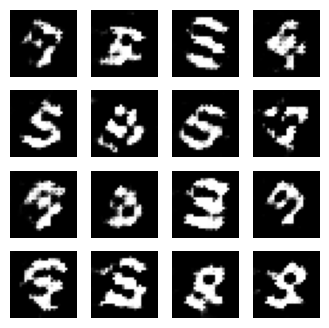

Epoch 1, Time: 17.70 sec, Gen Loss: 0.7881, Disc Loss: 1.3362


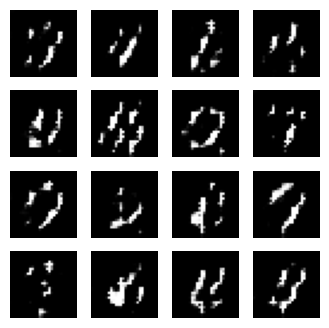

Epoch 2, Time: 17.67 sec, Gen Loss: 1.2765, Disc Loss: 1.0044


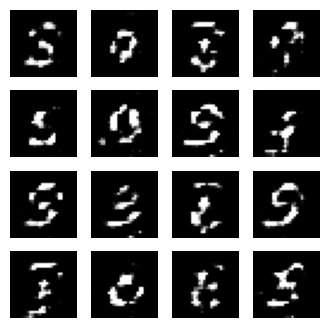

Epoch 3, Time: 17.98 sec, Gen Loss: 1.1447, Disc Loss: 1.0205


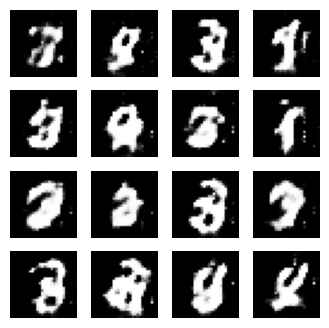

Epoch 4, Time: 17.68 sec, Gen Loss: 0.7857, Disc Loss: 1.3789


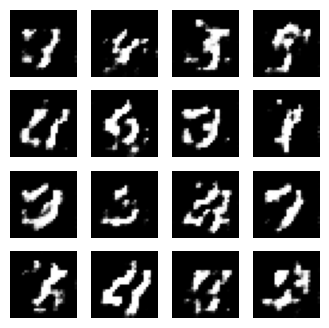

Epoch 5, Time: 17.64 sec, Gen Loss: 1.0802, Disc Loss: 1.1191


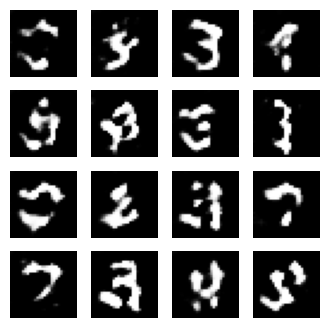

Epoch 6, Time: 17.73 sec, Gen Loss: 0.9482, Disc Loss: 1.2555


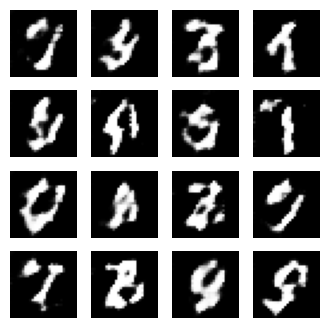

Epoch 7, Time: 17.59 sec, Gen Loss: 1.0810, Disc Loss: 1.2410


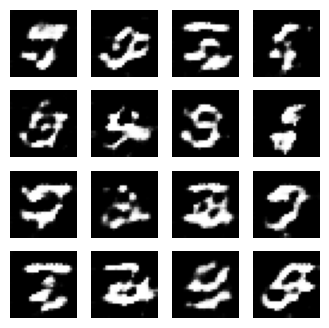

Epoch 8, Time: 17.65 sec, Gen Loss: 1.3866, Disc Loss: 0.8180


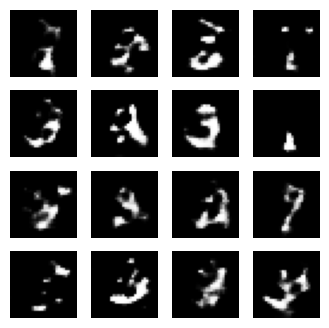

Epoch 9, Time: 17.69 sec, Gen Loss: 0.9393, Disc Loss: 1.1302


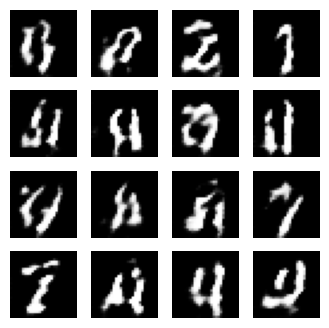

Epoch 10, Time: 17.98 sec, Gen Loss: 1.1537, Disc Loss: 0.9455


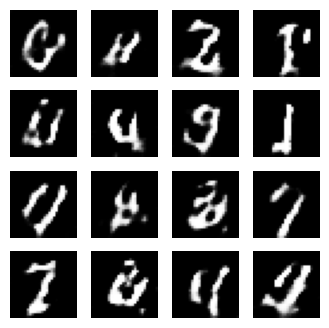

Epoch 11, Time: 17.65 sec, Gen Loss: 1.2935, Disc Loss: 0.9092


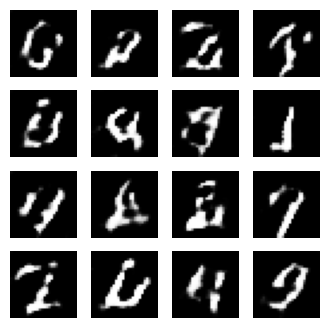

Epoch 12, Time: 17.62 sec, Gen Loss: 1.1420, Disc Loss: 1.1711


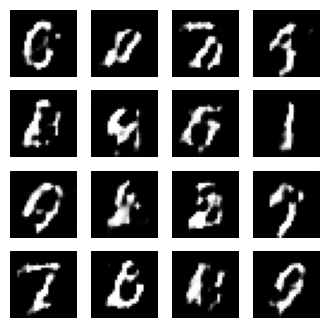

Epoch 13, Time: 17.64 sec, Gen Loss: 1.1949, Disc Loss: 1.0357


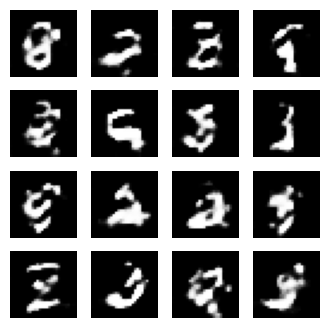

Epoch 14, Time: 17.62 sec, Gen Loss: 1.3990, Disc Loss: 0.9758


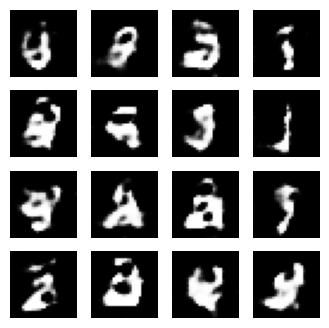

Epoch 15, Time: 17.64 sec, Gen Loss: 1.0613, Disc Loss: 1.1784


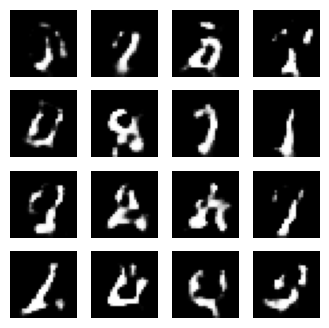

Epoch 16, Time: 17.63 sec, Gen Loss: 1.1799, Disc Loss: 0.9970


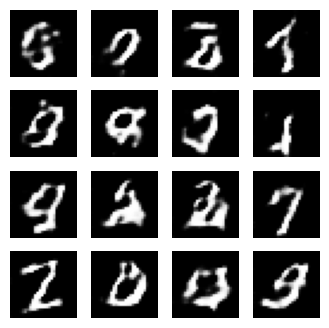

Epoch 17, Time: 17.96 sec, Gen Loss: 1.0261, Disc Loss: 1.2919


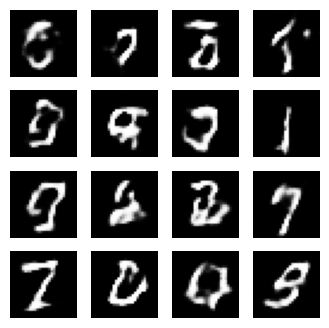

Epoch 18, Time: 17.67 sec, Gen Loss: 1.3484, Disc Loss: 0.8824


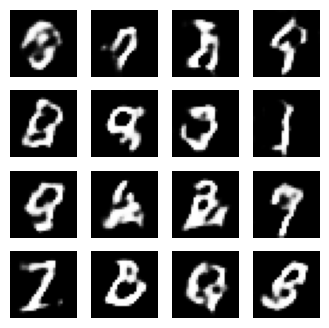

Epoch 19, Time: 17.65 sec, Gen Loss: 1.2133, Disc Loss: 0.9390


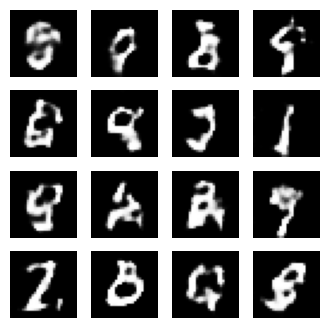

Epoch 20, Time: 17.69 sec, Gen Loss: 1.2736, Disc Loss: 0.9397


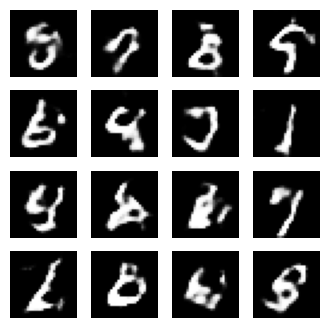

Epoch 21, Time: 17.63 sec, Gen Loss: 1.0294, Disc Loss: 1.1995


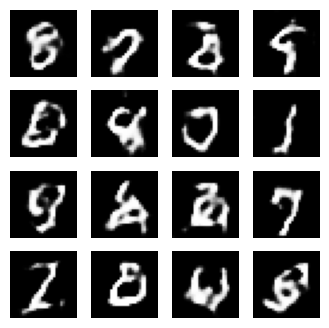

Epoch 22, Time: 17.66 sec, Gen Loss: 1.1968, Disc Loss: 1.0067


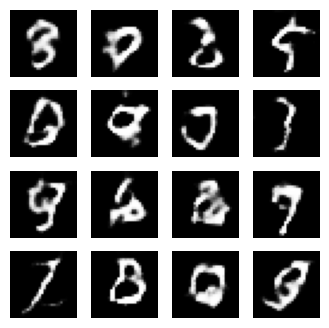

Epoch 23, Time: 17.66 sec, Gen Loss: 1.2285, Disc Loss: 1.1017


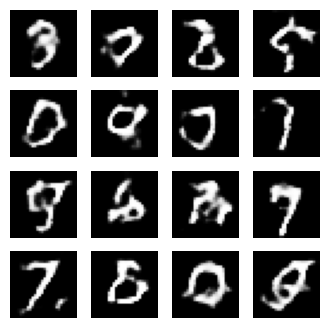

Epoch 24, Time: 18.02 sec, Gen Loss: 0.9996, Disc Loss: 1.2405


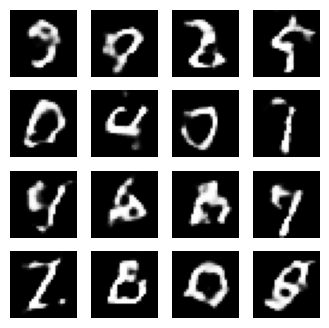

Epoch 25, Time: 17.70 sec, Gen Loss: 1.0936, Disc Loss: 1.1582


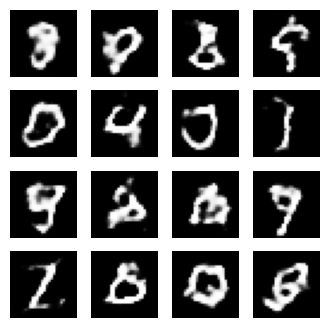

Epoch 26, Time: 17.66 sec, Gen Loss: 1.0310, Disc Loss: 1.1350


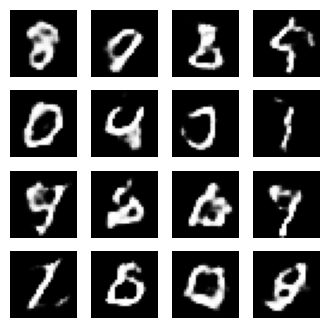

Epoch 27, Time: 17.64 sec, Gen Loss: 1.1068, Disc Loss: 1.2668


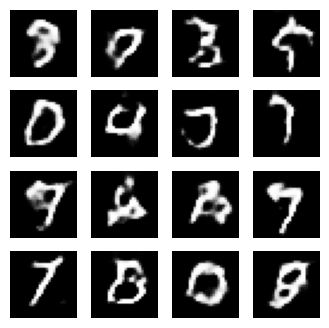

Epoch 28, Time: 17.61 sec, Gen Loss: 1.1200, Disc Loss: 1.1246


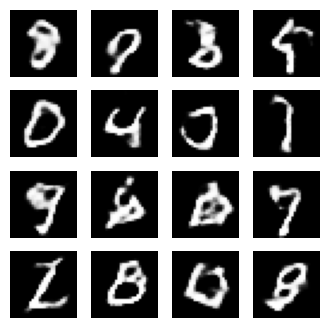

Epoch 29, Time: 17.64 sec, Gen Loss: 1.0398, Disc Loss: 1.2825


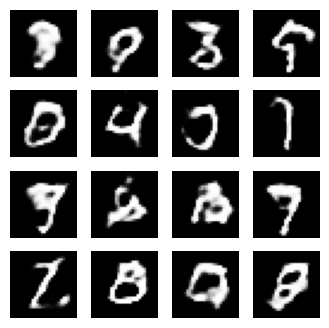

Epoch 30, Time: 17.63 sec, Gen Loss: 0.9847, Disc Loss: 1.1463


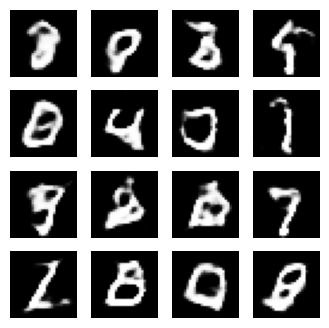

Epoch 31, Time: 17.64 sec, Gen Loss: 0.9425, Disc Loss: 1.2392


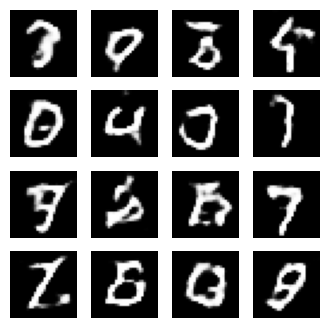

Epoch 32, Time: 18.00 sec, Gen Loss: 0.7602, Disc Loss: 1.4090


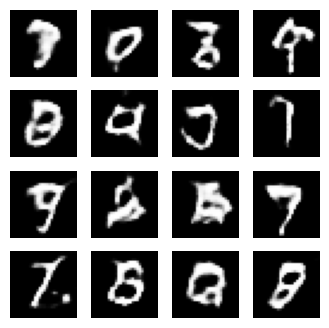

Epoch 33, Time: 17.60 sec, Gen Loss: 1.0205, Disc Loss: 1.3337


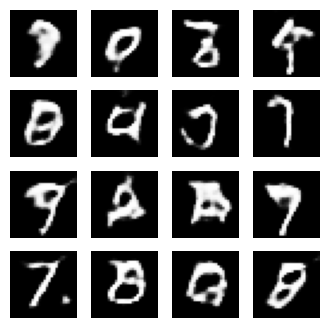

Epoch 34, Time: 17.64 sec, Gen Loss: 0.8845, Disc Loss: 1.1172


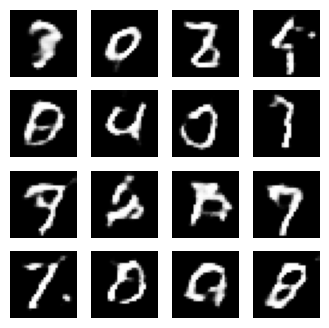

Epoch 35, Time: 17.60 sec, Gen Loss: 1.0467, Disc Loss: 1.2166


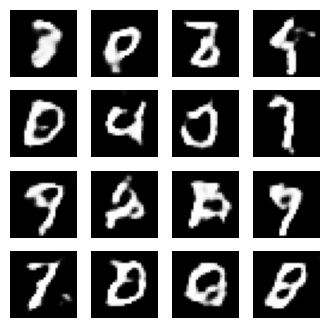

Epoch 36, Time: 17.65 sec, Gen Loss: 0.9893, Disc Loss: 1.2757


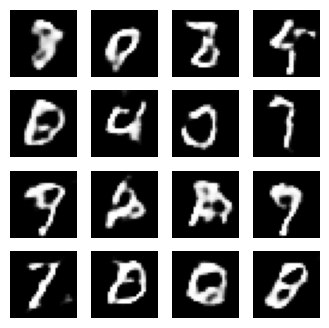

Epoch 37, Time: 17.59 sec, Gen Loss: 1.0300, Disc Loss: 1.2376


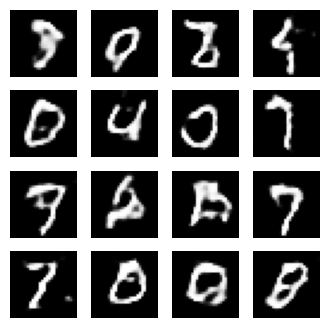

Epoch 38, Time: 17.63 sec, Gen Loss: 0.9679, Disc Loss: 1.2228


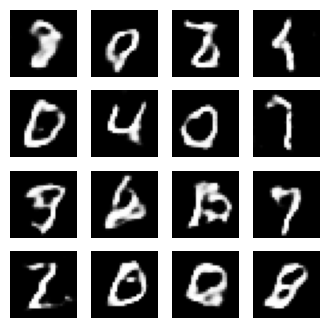

Epoch 39, Time: 17.95 sec, Gen Loss: 0.9751, Disc Loss: 1.3064


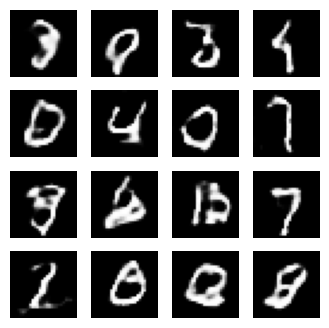

Epoch 40, Time: 17.64 sec, Gen Loss: 0.9082, Disc Loss: 1.2066


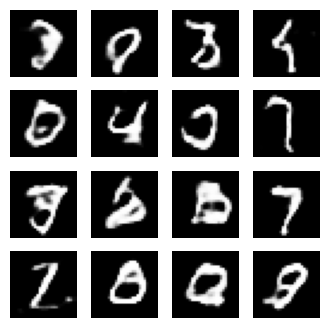

Epoch 41, Time: 17.76 sec, Gen Loss: 0.9149, Disc Loss: 1.2111


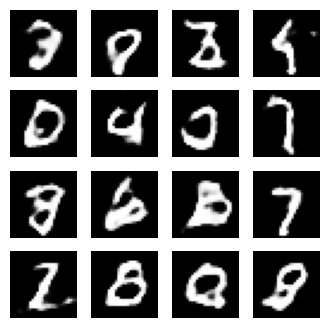

Epoch 42, Time: 17.69 sec, Gen Loss: 1.0643, Disc Loss: 0.9962


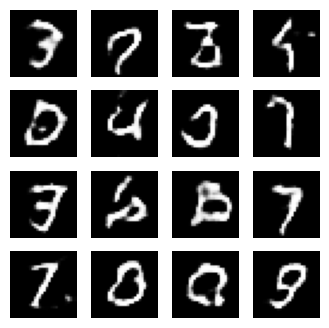

Epoch 43, Time: 17.64 sec, Gen Loss: 1.0607, Disc Loss: 1.2472


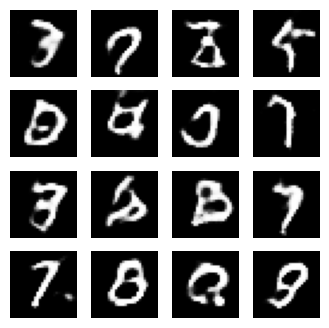

Epoch 44, Time: 17.62 sec, Gen Loss: 0.9075, Disc Loss: 1.3660


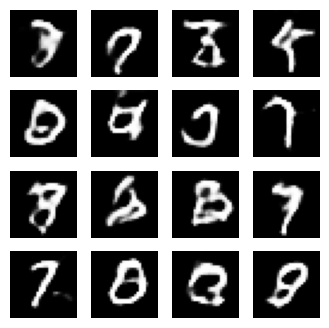

Epoch 45, Time: 17.63 sec, Gen Loss: 0.8551, Disc Loss: 1.2636


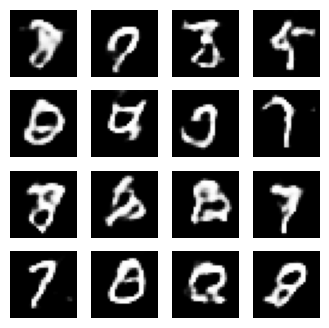

Epoch 46, Time: 18.01 sec, Gen Loss: 0.8949, Disc Loss: 1.1671


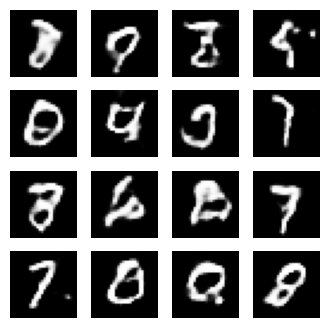

Epoch 47, Time: 17.60 sec, Gen Loss: 1.0370, Disc Loss: 1.1332


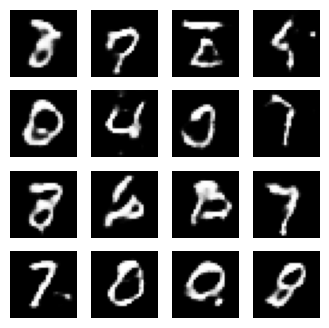

Epoch 48, Time: 17.64 sec, Gen Loss: 1.0111, Disc Loss: 1.2852


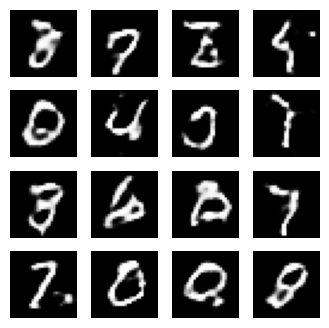

Epoch 49, Time: 17.65 sec, Gen Loss: 1.0111, Disc Loss: 1.1240


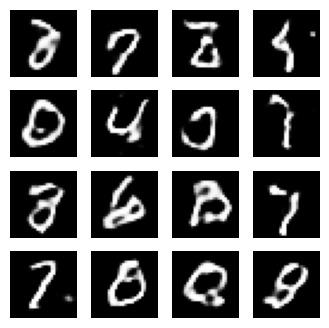

Epoch 50, Time: 17.67 sec, Gen Loss: 0.9965, Disc Loss: 1.2594


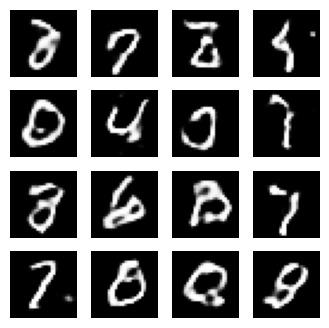

In [9]:

# Step 9: Run training
# Parameters
noise_dim = 100
batch_size = 256
epochs = 50
num_examples_to_generate = 16

# Seed for consistent visualization
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# Load data
train_dataset = load_mnist_data()

# Start training
train(train_dataset, epochs)

# Note: Generated images are saved in 'generated_images/' and displayed after each epoch.